In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats

In [2]:
csv_file_path = "csvs/POILBREUSDM.csv"
df = pd.read_csv(csv_file_path)

if df.isnull().values.any():
    print("if") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,POILBREUSDM
DATE,
1990-01-01,20.989130
1990-02-01,19.702500
1990-03-01,18.465909
1990-04-01,16.926190
1990-05-01,16.671739
...,...
2023-06-01,74.975000
2023-07-01,80.109048
2023-08-01,85.168261


In [3]:
# Replace 'path/to/csv/files/' with the actual path to the directory containing your CSV files
csv_files = glob.glob('csvs/*.csv')

for csv_file in csv_files:
    # Read each CSV file
    df_new = pd.read_csv(csv_file, parse_dates=True, index_col='DATE')

    # Merge with the original DataFrame
    df = pd.merge(df, df_new, how='left', left_index=True, right_index=True)


#df_original.rename(columns={'column_from_second_csv': 'new_column_name'}, inplace=True)
df = df.dropna()
df = df.drop('POILBREUSDM_y', axis=1)
df.rename(columns={'POILBREUSDM_x': 'POILBREUSDM'}, inplace=True)
df = df.round(2)
df

,POILBREUSDM,EMVOVERALLEMV,EUEPUINDXM,FEDFUNDS,GACDISA066MSFRBNY,INFECTDISEMVTRACK,MCOILWTICO,MHHNGSP,PNGASEUUSDM,PNGASJPUSDM,PNICKUSDM,POILDUBUSDM,TB3MS,TB6MS,USEPUINDXM
DATE,,,,,,,,,,,,,,,
2001-07-01,24.99,22.32,98.43,3.77,-13.3,0.79,26.43,3.11,3.78,5.05,5962.55,23.40,3.51,3.45,102.13
2001-08-01,25.74,19.97,73.70,3.65,-8.0,0.39,27.37,2.97,3.78,4.73,5525.64,24.56,3.36,3.29,84.29
2001-09-01,25.84,42.43,215.05,3.07,-12.5,0.78,26.20,2.19,3.78,4.63,5057.65,24.24,2.64,2.63,188.06
2001-10-01,21.03,29.34,204.66,2.49,-14.7,0.72,22.17,2.46,3.24,4.65,4830.78,19.93,2.16,2.12,173.14
2001-11-01,19.11,26.40,165.27,2.09,-21.5,0.81,19.64,2.34,3.24,3.95,5131.32,17.50,1.87,1.88,130.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,74.97,18.83,247.21,5.08,6.6,6.73,70.25,2.18,10.29,10.11,21233.28,74.73,5.16,5.19,145.03
2023-07-01,80.11,18.11,263.57,5.12,1.1,5.92,76.07,2.55,9.61,10.88,21091.26,80.65,5.25,5.27,117.77
2023-08-01,85.17,17.28,287.96,5.33,-19.0,5.34,81.39,2.58,10.72,11.75,20446.36,86.12,5.30,5.28,88.47


# BRENT AS Y

In [4]:
dfs = df[['POILBREUSDM', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs

,POILBREUSDM,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
DATE,,,,,,,,,,
2001-07-01,24.99,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55
2001-08-01,25.74,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64
2001-09-01,25.84,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65
2001-10-01,21.03,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78
2001-11-01,19.11,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,74.97,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28
2023-07-01,80.11,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26
2023-08-01,85.17,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36


In [5]:
dfs.to_excel("basics/BRENT.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [6]:
dfs.to_csv('basics/BRENT.csv',index=True)
print("DataFrame saved")

DataFrame saved


# WTI AS Y

In [7]:
dfs = df[['MCOILWTICO', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs

,MCOILWTICO,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
DATE,,,,,,,,,,
2001-07-01,26.43,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55
2001-08-01,27.37,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64
2001-09-01,26.20,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65
2001-10-01,22.17,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78
2001-11-01,19.64,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,70.25,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28
2023-07-01,76.07,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26
2023-08-01,81.39,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36


In [8]:
dfs.to_excel("basics/WTI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [9]:
dfs.to_csv('basics/WTI.csv',index=True)
print("DataFrame saved")

DataFrame saved


# DUBAI CRUDE AS Y

In [10]:
dfs = df[['POILDUBUSDM', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs

,POILDUBUSDM,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
DATE,,,,,,,,,,
2001-07-01,23.40,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55
2001-08-01,24.56,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64
2001-09-01,24.24,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65
2001-10-01,19.93,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78
2001-11-01,17.50,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,74.73,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28
2023-07-01,80.65,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26
2023-08-01,86.12,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36


In [11]:
dfs.to_excel("basics/DUBAI.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [12]:
dfs.to_csv('basics/DUBAI.csv',index=True)
print("DataFrame saved")

DataFrame saved


# HENRY HUB AS Y

In [13]:
dfs = df[['MHHNGSP', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs

,MHHNGSP,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
DATE,,,,,,,,,,
2001-07-01,3.11,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55
2001-08-01,2.97,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64
2001-09-01,2.19,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65
2001-10-01,2.46,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78
2001-11-01,2.34,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,2.18,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28
2023-07-01,2.55,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26
2023-08-01,2.58,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36


In [14]:
dfs.to_excel("basics/HENRYHUB.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [15]:
dfs.to_csv('basics/HENRYHUB.csv',index=True)
print("DataFrame saved")

DataFrame saved


# NATURAL GAS IN EU AS Y

In [16]:
dfs = df[['PNGASEUUSDM', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs

,PNGASEUUSDM,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
DATE,,,,,,,,,,
2001-07-01,3.78,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55
2001-08-01,3.78,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64
2001-09-01,3.78,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65
2001-10-01,3.24,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78
2001-11-01,3.24,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,10.29,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28
2023-07-01,9.61,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26
2023-08-01,10.72,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36


In [17]:
dfs.to_excel("basics/EUNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [18]:
dfs.to_csv('basics/EUNG.csv',index=True)
print("DataFrame saved")

DataFrame saved


# LNG IN ASIA AS Y

In [19]:
dfs = df[['PNGASJPUSDM', 'EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM']]
dfs

,PNGASJPUSDM,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM
DATE,,,,,,,,,,
2001-07-01,5.05,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55
2001-08-01,4.73,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64
2001-09-01,4.63,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65
2001-10-01,4.65,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78
2001-11-01,3.95,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,10.11,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28
2023-07-01,10.88,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26
2023-08-01,11.75,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36


In [20]:
dfs.to_excel("basics/ASIALNG.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [21]:
dfs.to_csv('basics/ASIALNG.csv',index=True)
print("DataFrame saved")

DataFrame saved


# Full

In [22]:
df = df[['EMVOVERALLEMV', 'EUEPUINDXM', 'USEPUINDXM', 'GACDISA066MSFRBNY', 'FEDFUNDS', 'TB3MS', 'TB6MS', 'INFECTDISEMVTRACK', 'PNICKUSDM','POILBREUSDM','MCOILWTICO', 'POILDUBUSDM','PNGASEUUSDM', 'MHHNGSP', 'PNGASJPUSDM']]
df

,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM
DATE,,,,,,,,,,,,,,,
2001-07-01,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55,24.99,26.43,23.40,3.78,3.11,5.05
2001-08-01,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64,25.74,27.37,24.56,3.78,2.97,4.73
2001-09-01,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65,25.84,26.20,24.24,3.78,2.19,4.63
2001-10-01,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78,21.03,22.17,19.93,3.24,2.46,4.65
2001-11-01,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32,19.11,19.64,17.50,3.24,2.34,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,18.83,247.21,145.03,6.6,5.08,5.16,5.19,6.73,21233.28,74.97,70.25,74.73,10.29,2.18,10.11
2023-07-01,18.11,263.57,117.77,1.1,5.12,5.25,5.27,5.92,21091.26,80.11,76.07,80.65,9.61,2.55,10.88
2023-08-01,17.28,287.96,88.47,-19.0,5.33,5.30,5.28,5.34,20446.36,85.17,81.39,86.12,10.72,2.58,11.75


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 268 entries, 2001-07-01 to 2023-10-01
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EMVOVERALLEMV      268 non-null    float64
 1   EUEPUINDXM         268 non-null    float64
 2   USEPUINDXM         268 non-null    float64
 3   GACDISA066MSFRBNY  268 non-null    float64
 4   FEDFUNDS           268 non-null    float64
 5   TB3MS              268 non-null    float64
 6   TB6MS              268 non-null    float64
 7   INFECTDISEMVTRACK  268 non-null    float64
 8   PNICKUSDM          268 non-null    float64
 9   POILBREUSDM        268 non-null    float64
 10  MCOILWTICO         268 non-null    float64
 11  POILDUBUSDM        268 non-null    float64
 12  PNGASEUUSDM        268 non-null    float64
 13  MHHNGSP            268 non-null    float64
 14  PNGASJPUSDM        268 non-null    float64
dtypes: float64(15)
memory usage: 33.5 KB


In [24]:
df.describe()

,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,20.647425,177.736866,126.560075,7.414552,1.488470,1.400858,1.502612,3.001866,16776.620112,68.861157,65.277127,66.146082,9.203769,4.431082,11.003806
std,8.237360,79.045787,45.154110,15.930259,1.665155,1.598155,1.610447,6.801003,7649.918218,28.241723,25.066646,27.696160,8.077270,2.193610,7.407296
min,9.570000,47.690000,57.200000,-78.200000,0.050000,0.010000,0.040000,0.050000,4830.780000,18.680000,16.550000,17.500000,1.460000,1.630000,2.030000
25%,15.360000,114.447500,93.910000,-1.525000,0.130000,0.090000,0.150000,0.407500,11743.745000,47.620000,46.690000,44.642500,4.720000,2.830000,6.127500
50%,18.400000,166.780000,118.865000,8.750000,1.000000,0.920000,1.005000,0.600000,15094.340000,65.615000,62.710000,64.105000,7.790000,3.830000,8.695000
75%,23.372500,228.060000,150.007500,18.525000,2.217500,2.137500,2.210000,1.002500,19914.680000,90.692500,84.680000,86.402500,10.847500,5.735000,14.480000
max,69.830000,433.280000,350.460000,43.000000,5.330000,5.340000,5.330000,58.120000,51783.330000,133.590000,133.880000,130.080000,69.980000,13.420000,54.160000


In [25]:
df.to_excel("basics/ALL.xlsx", index=True)
print("DataFrame saved")

DataFrame saved


In [26]:
df.head(50)

,EMVOVERALLEMV,EUEPUINDXM,USEPUINDXM,GACDISA066MSFRBNY,FEDFUNDS,TB3MS,TB6MS,INFECTDISEMVTRACK,PNICKUSDM,POILBREUSDM,MCOILWTICO,POILDUBUSDM,PNGASEUUSDM,MHHNGSP,PNGASJPUSDM
DATE,,,,,,,,,,,,,,,
2001-07-01,22.32,98.43,102.13,-13.3,3.77,3.51,3.45,0.79,5962.55,24.99,26.43,23.40,3.78,3.11,5.05
2001-08-01,19.97,73.70,84.29,-8.0,3.65,3.36,3.29,0.39,5525.64,25.74,27.37,24.56,3.78,2.97,4.73
2001-09-01,42.43,215.05,188.06,-12.5,3.07,2.64,2.63,0.78,5057.65,25.84,26.20,24.24,3.78,2.19,4.63
2001-10-01,29.34,204.66,173.14,-14.7,2.49,2.16,2.12,0.72,4830.78,21.03,22.17,19.93,3.24,2.46,4.65
2001-11-01,26.40,165.27,130.58,-21.5,2.09,1.87,1.88,0.81,5131.32,19.11,19.64,17.50,3.24,2.34,3.95
2001-12-01,24.36,111.51,117.24,-9.8,1.82,1.69,1.78,0.42,5315.82,18.68,19.39,17.84,3.22,2.30,3.68
2002-01-01,28.65,105.64,116.84,1.4,1.73,1.65,1.73,0.71,6061.36,20.03,19.72,18.35,2.79,2.32,3.57
2002-02-01,24.85,101.53,87.60,13.3,1.74,1.72,1.82,0.58,6039.95,20.54,20.72,19.15,2.79,2.32,3.64
2002-03-01,17.77,85.99,83.44,13.8,1.73,1.79,2.00,0.26,6543.20,24.00,24.53,22.97,2.79,3.03,3.69


In [27]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

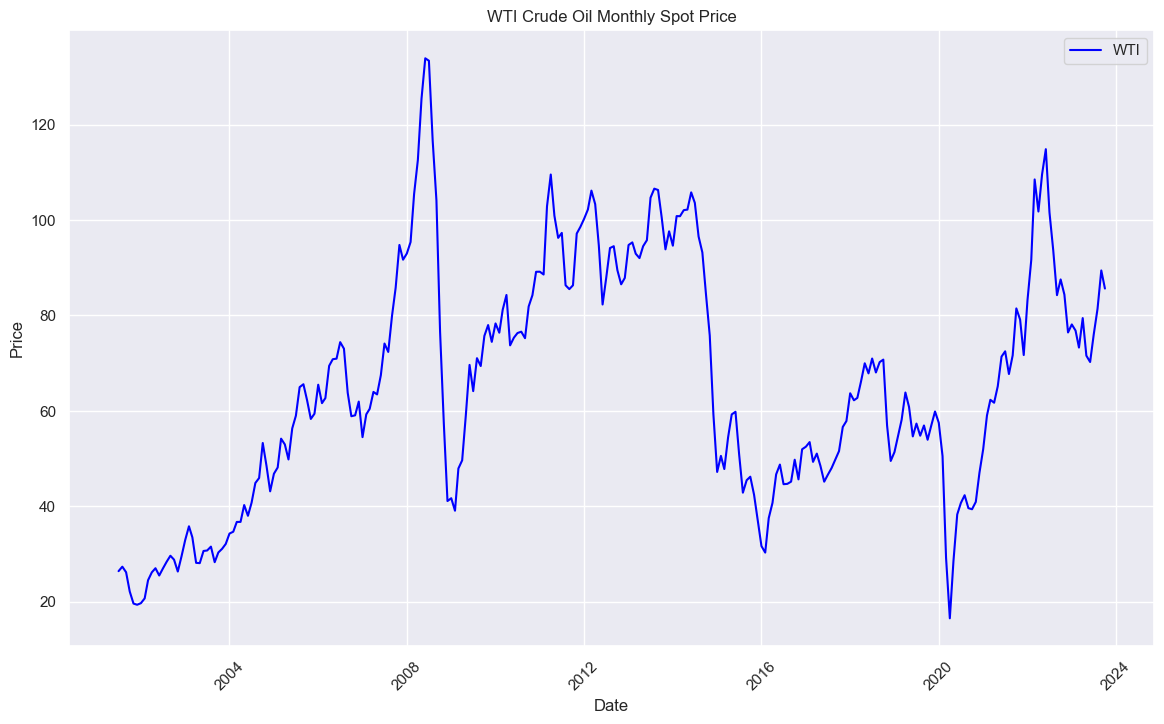

In [31]:
plt.figure(figsize=(14, 8)) 
#plt.plot(df['POILBREUSDM'], label='Brent', color='blue')
plt.plot(df['MCOILWTICO'], label='WTI', color='blue')
#plt.plot(df['POILDUBUSDM'], label='Dubai', color='green')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('WTI Crude Oil Monthly Spot Price')

plt.xticks(rotation=45)

plt.legend()
plt.show()

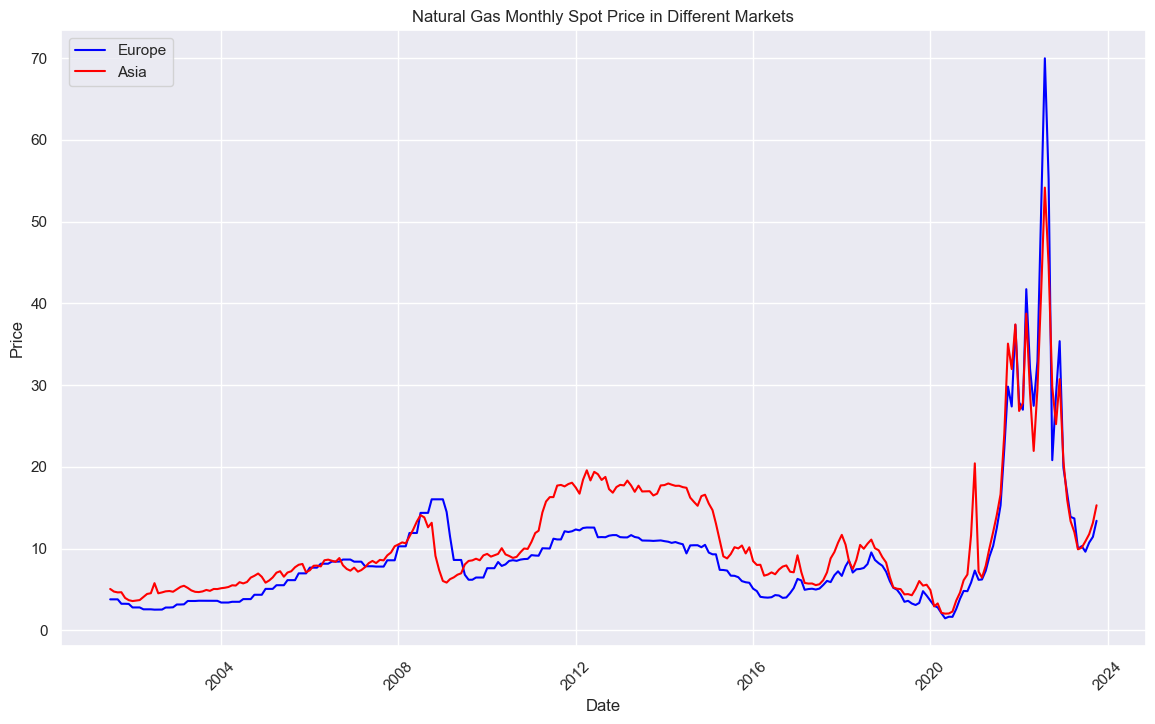

In [29]:
plt.figure(figsize=(14, 8)) 
plt.plot(df['PNGASEUUSDM'], label='Europe', color='blue')
#plt.plot(df['MHHNGSP'], label='North America', color='red')
plt.plot(df['PNGASJPUSDM'], label='Asia', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Natural Gas Monthly Spot Price in Different Markets')

plt.xticks(rotation=45)

plt.legend()
plt.show()